<a href="https://colab.research.google.com/github/Inshalmunaf/Used-Car-prediction/blob/main/Used_Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("avikasliwal/used-cars-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 172k/172k [00:00<00:00, 9.61MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/avikasliwal/used-cars-price-prediction/versions/2


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(path + '/train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df_test = pd.read_csv(path + '/test-data.csv')
df_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


First Checking the missing values

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


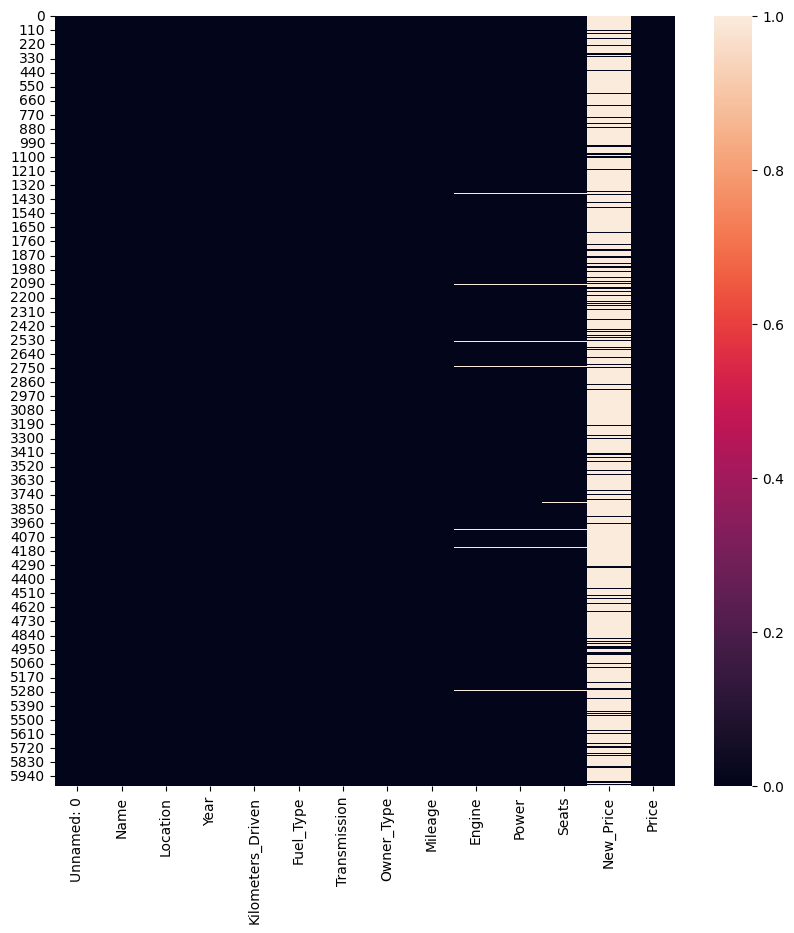

In [9]:
def null_value_graph():
  plt.figure(figsize=(10,10))
  sns.heatmap(df.isnull() , cbar = 'False')
  plt.show()

null_value_graph()

Dropping the (new Price  Column)

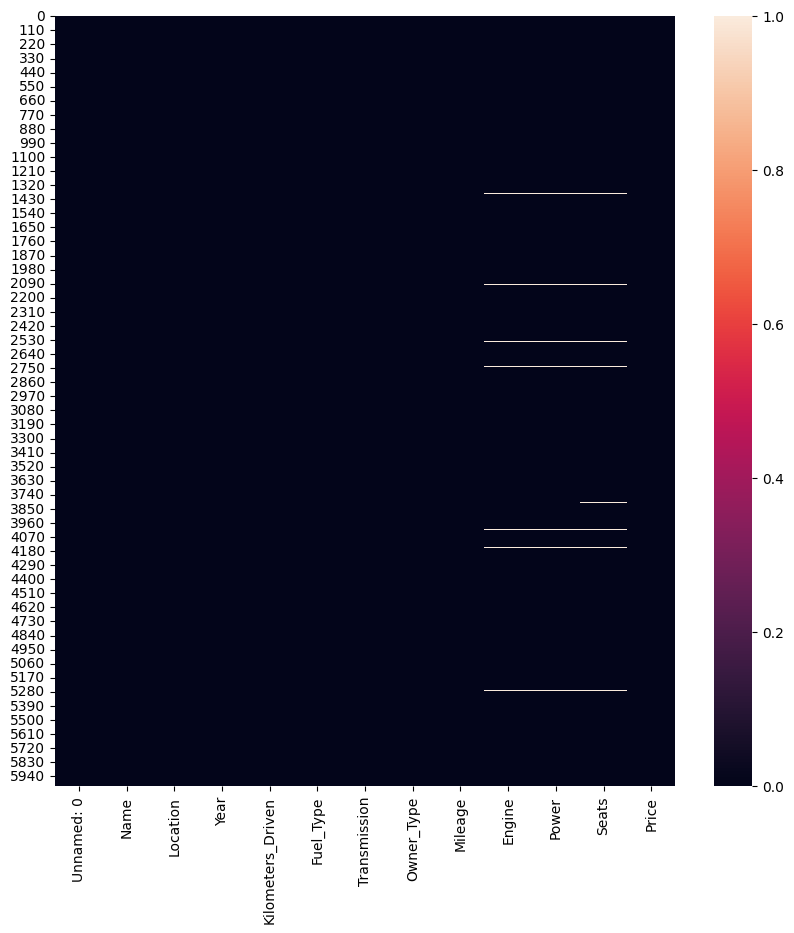

In [10]:
df = df.drop('New_Price' , axis= 1)
null_value_graph()

In [11]:
df.dropna(inplace = True , how= 'any', axis=0)

In [12]:
df.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


Removing Outliers

In [13]:
df.max()

,0
Unnamed: 0,6018
Name,Volvo XC90 2007-2015 D5 AWD
Location,Pune
Year,2019
Kilometers_Driven,6500000
Fuel_Type,Petrol
Transmission,Manual
Owner_Type,Third
Mileage,9.9 kmpl
Engine,999 CC


In [14]:
df.min()

,0
Unnamed: 0,0
Name,Ambassador Classic Nova Diesel
Location,Ahmedabad
Year,1998
Kilometers_Driven,171
Fuel_Type,CNG
Transmission,Automatic
Owner_Type,First
Mileage,0.0 kmpl
Engine,1047 CC


# **Outliers**

In [15]:
#Plotting to see any outlier
def outlier_detection(xlabel , subplot):
  plt.figure(figsize = (20,20))
  for index ,value in enumerate(xlabel):
    try:
      try:
        if subplot:
            plt.subplot(int(np.ceil(len(xlabel)/2)) , int(np.ceil(len(xlabel)/2)),index)
        sns.scatterplot(data = df ,x= f'{xlabel[index]}' , y = 'Price')
        plt.xlabel(f'{xlabel[index]}')
        plt.ylabel('Price')
        plt.title(f'{xlabel[index]} vs Price')
        plt.xticks([])
        plt.yticks([])

      except:
        print('Error : Incorrect column name')
    except:
      print('Error : No Columns in the xlabel')

  plt.show()


In [16]:
np.ceil(5/2)

np.float64(3.0)

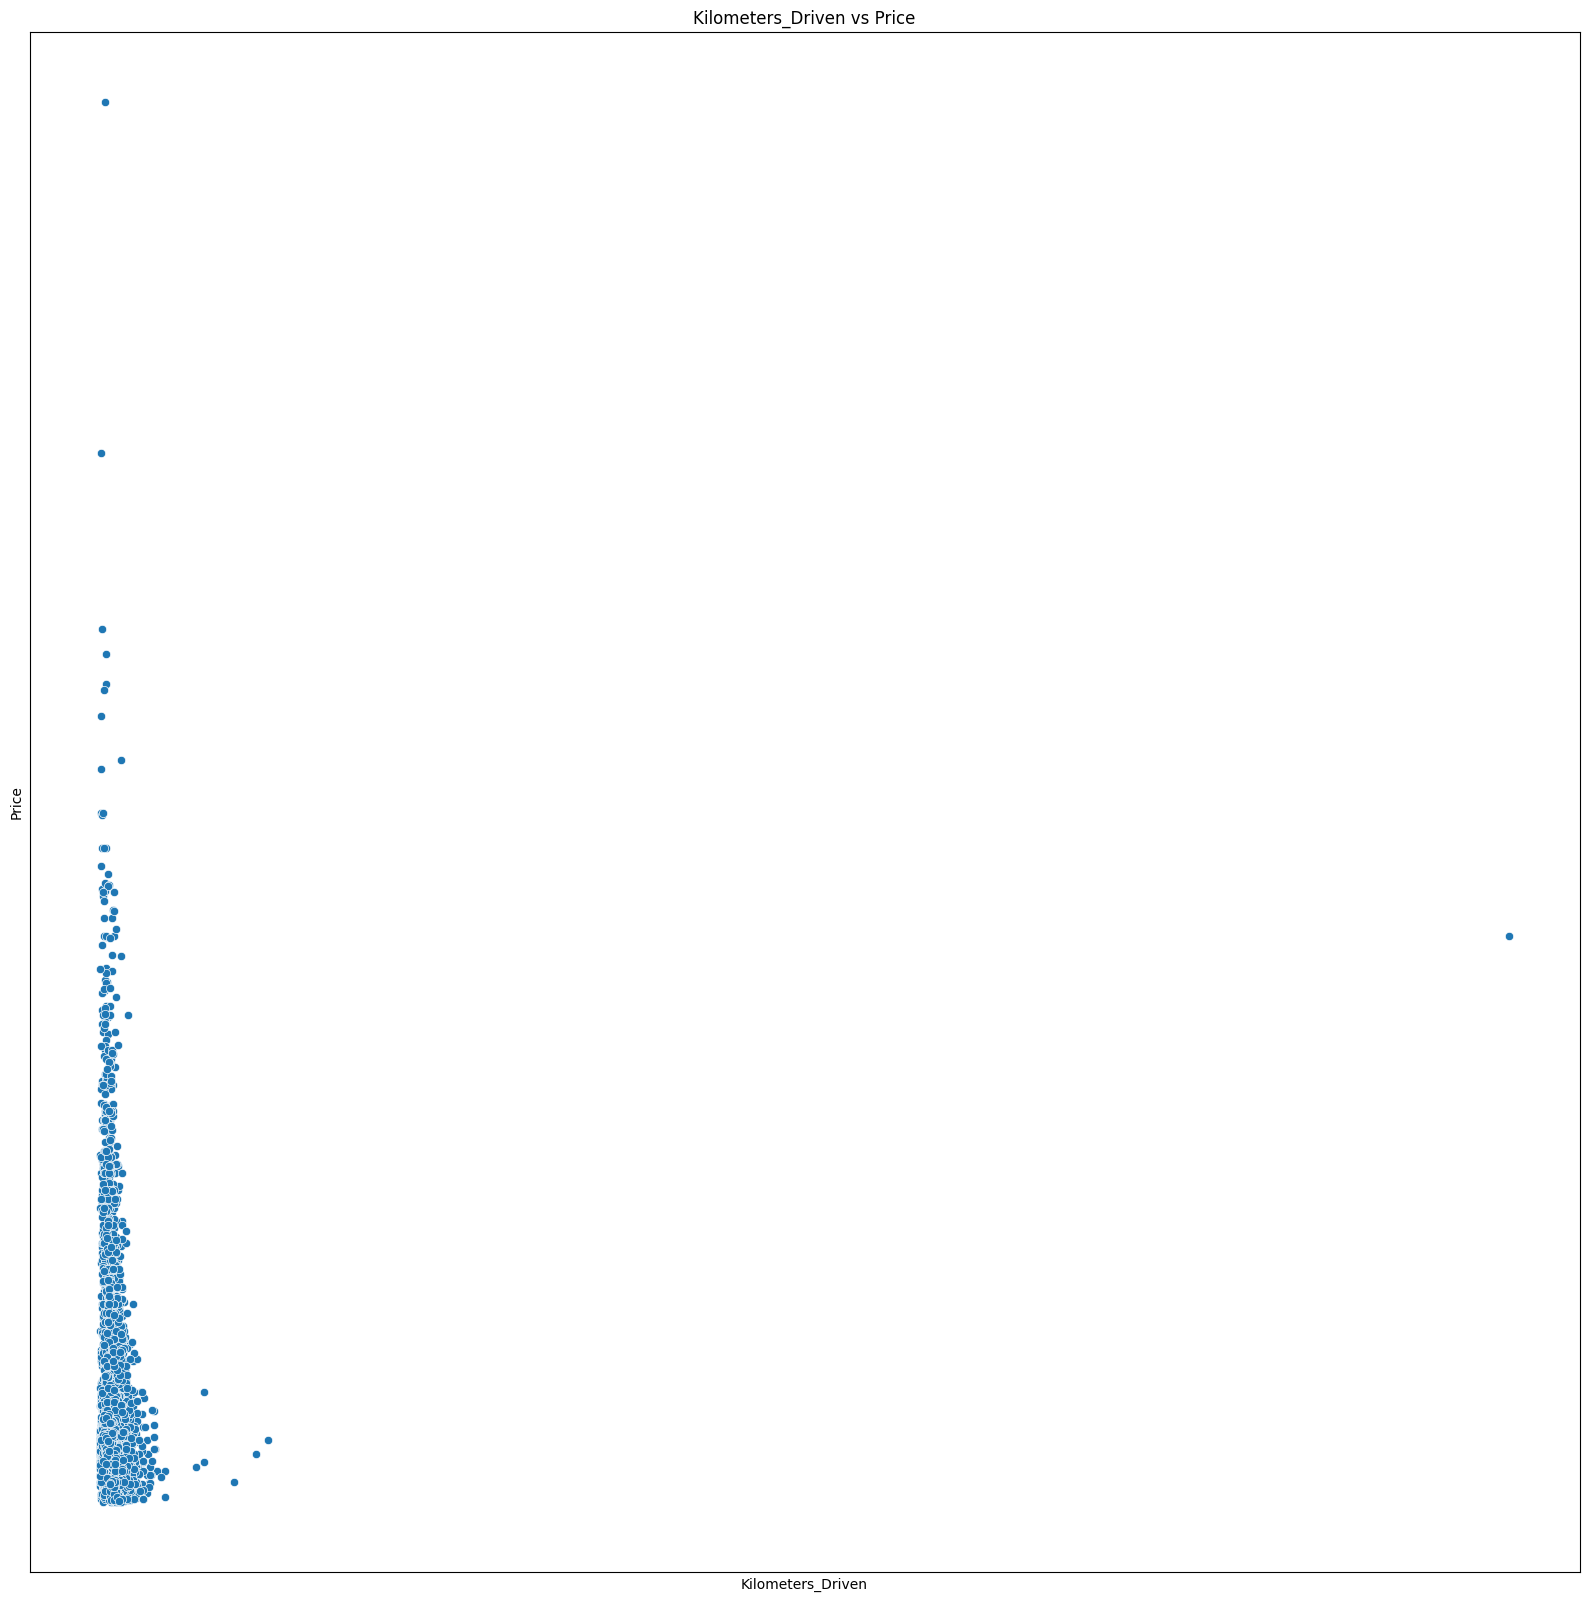

In [17]:
outlier_detection(['Kilometers_Driven'] , subplot=False)

In [18]:
# ------ Using Z score Method to remove outliers ------

#finding mean and standard deviation
mean_kd = np.mean(df['Kilometers_Driven'])
std_kd = np.std(df['Kilometers_Driven'])

#finidind z scores  values for kilometer driven
df['Z_score_kilometers_driven'] = (df['Kilometers_Driven'] - mean_kd ) / std_kd
threshold = 2.5

#finding outliers in the dataset
outliers = df[df['Z_score_kilometers_driven'] > threshold]


The outliers seems to be far away from other data hence it might be a typo

In [19]:
#Dropping outiers row entirely
df = df.drop(outliers.index)

Visualization

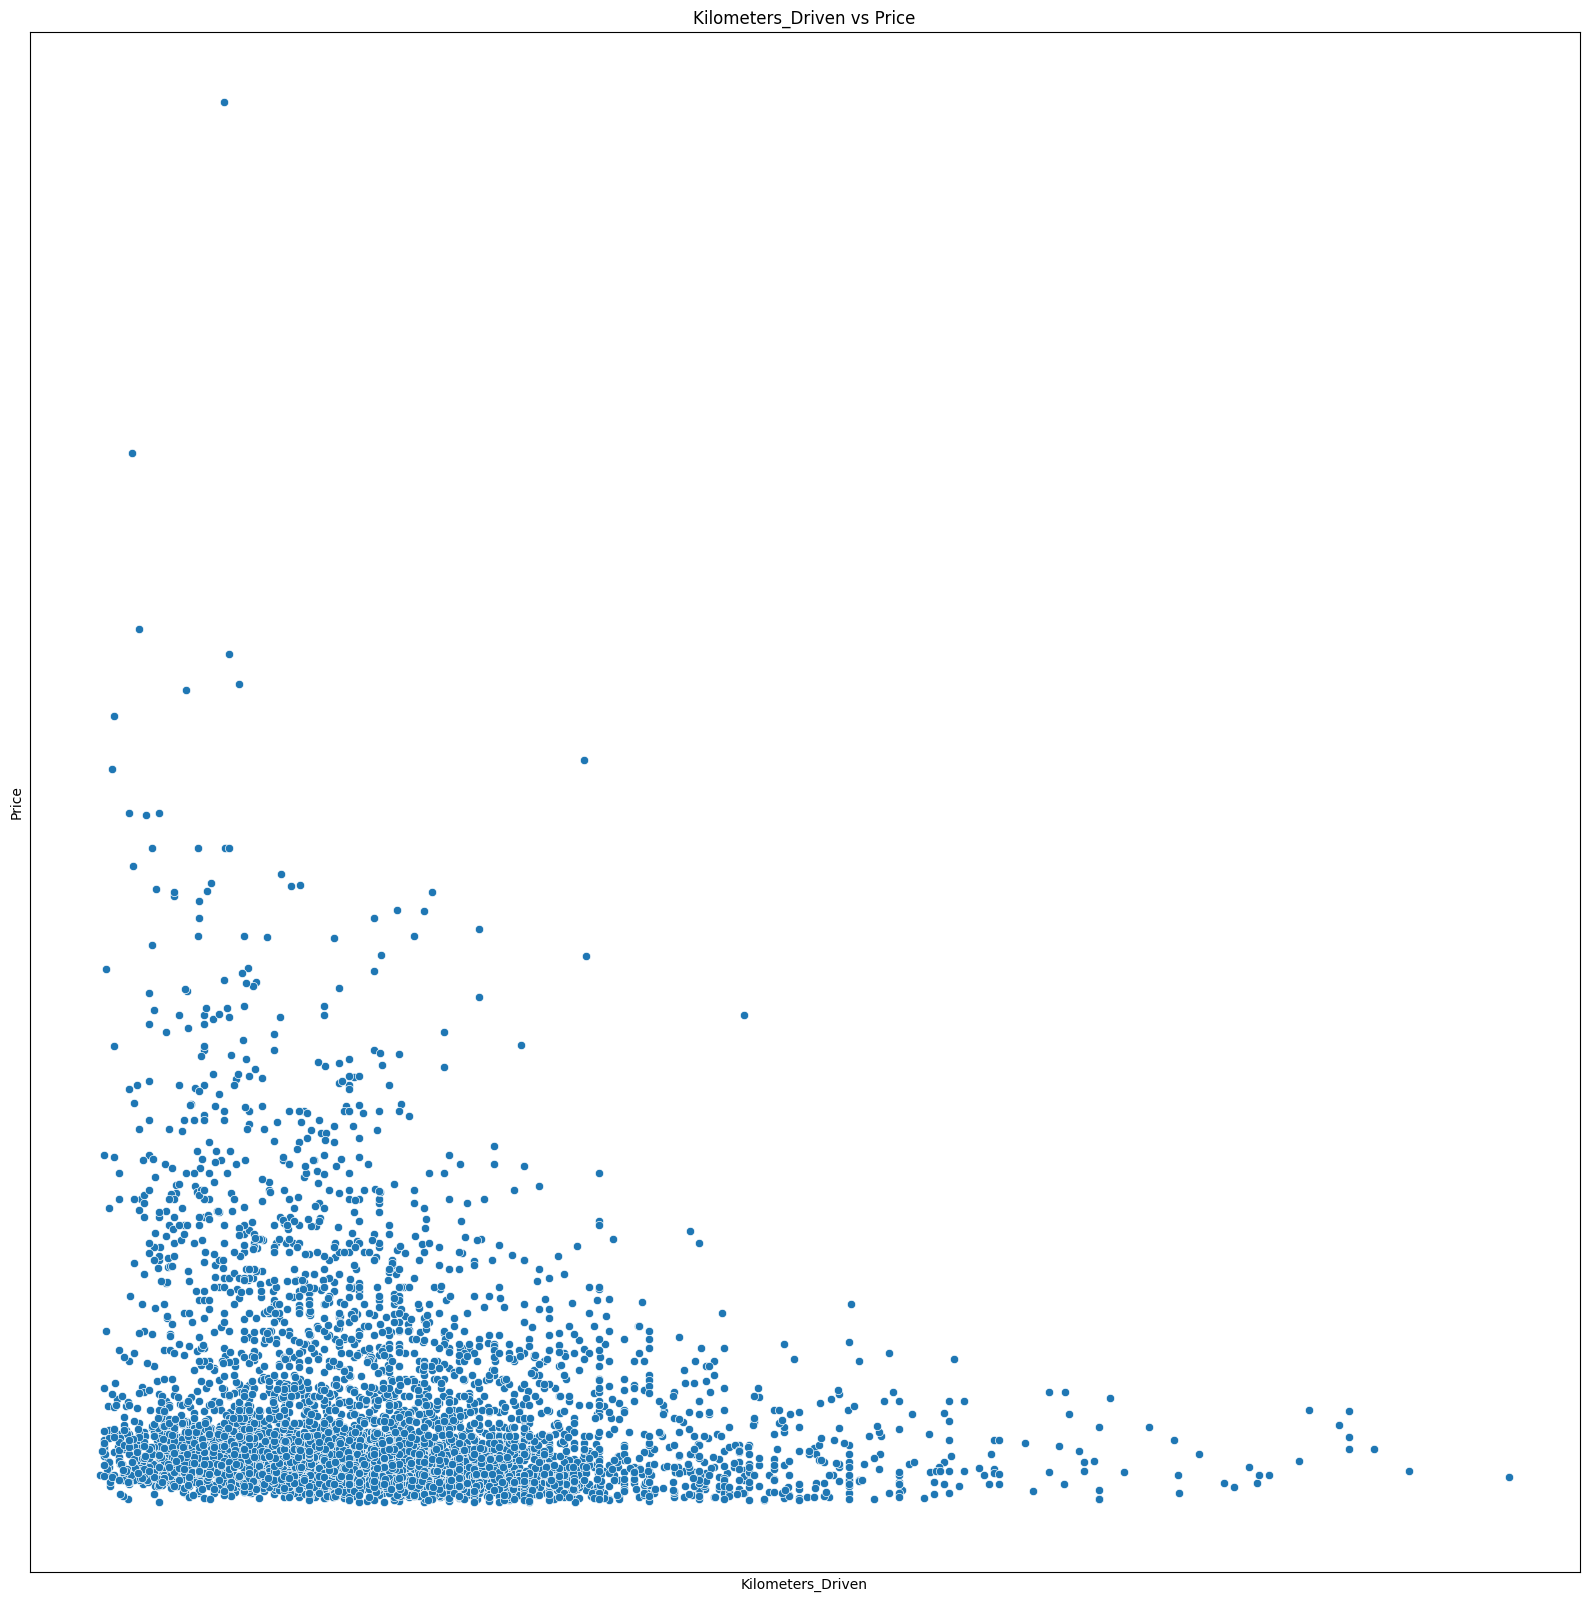

In [20]:
outlier_detection(['Kilometers_Driven'] , subplot=False)


Doing same Process with other columns

In [21]:
df.max()

,0
Unnamed: 0,6018
Name,Volvo XC90 2007-2015 D5 AWD
Location,Pune
Year,2019
Kilometers_Driven,282000
Fuel_Type,Petrol
Transmission,Manual
Owner_Type,Third
Mileage,9.9 kmpl
Engine,999 CC


Error : Incorrect column name


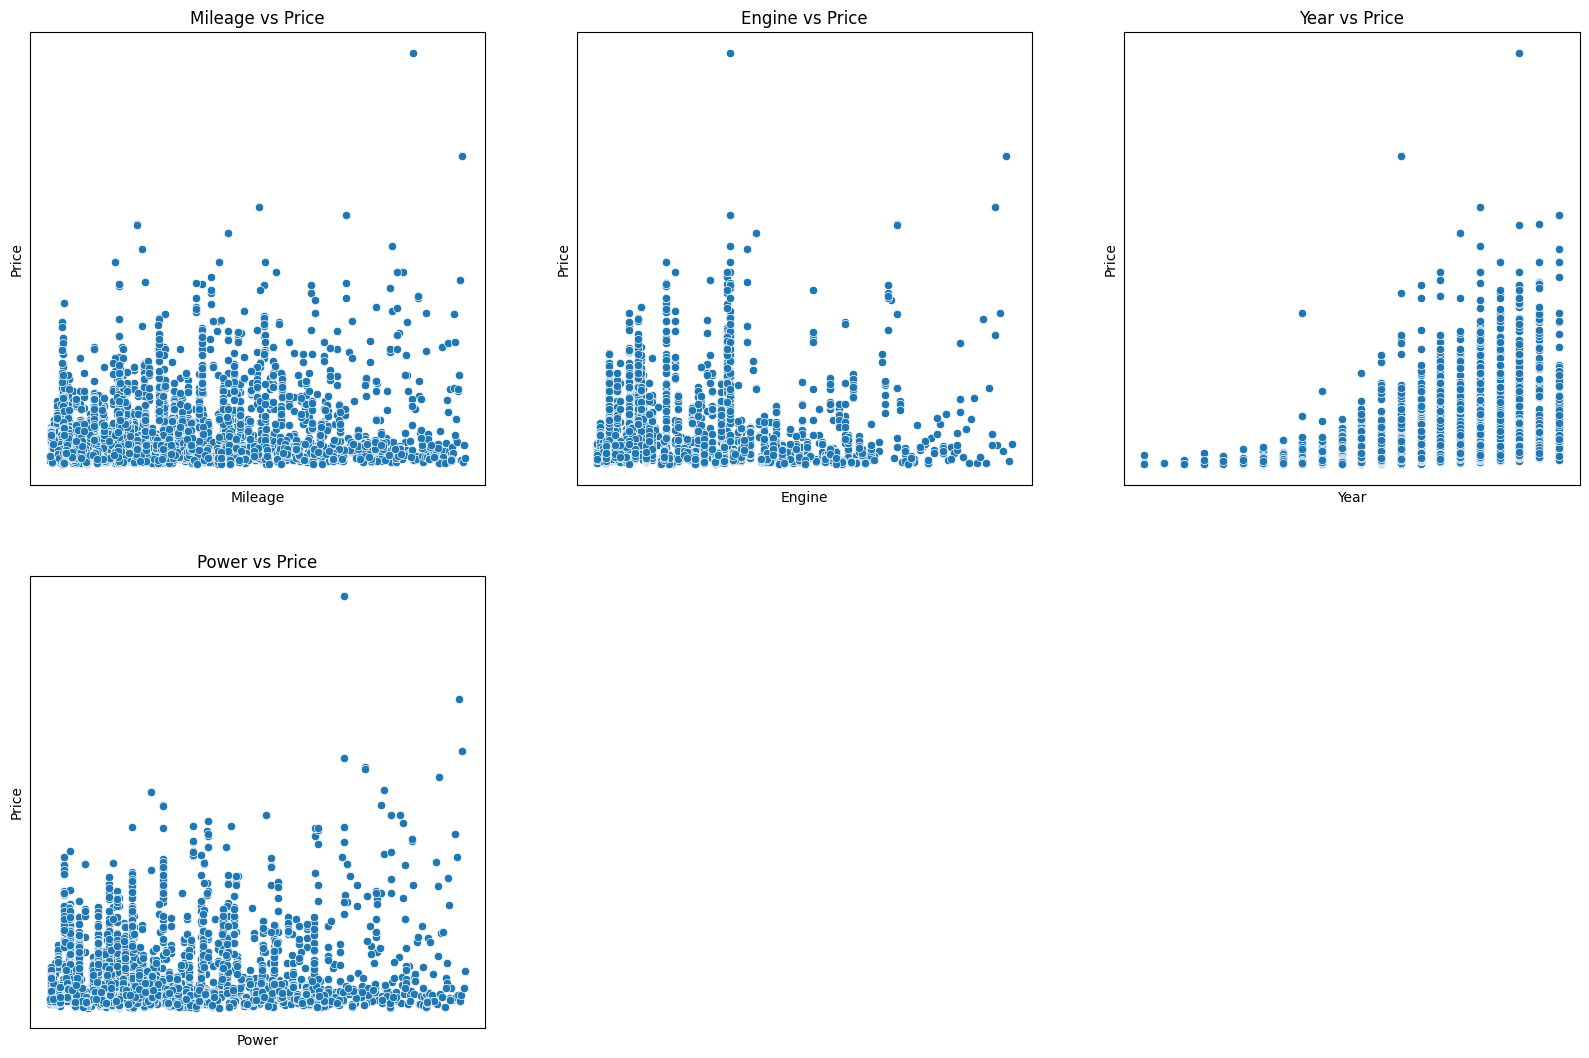

In [22]:
outlier_detection(['Seats' , 'Mileage' , 'Engine', 'Year' , 'Power'] , subplot=True)

Comparing Categorical colmns with price

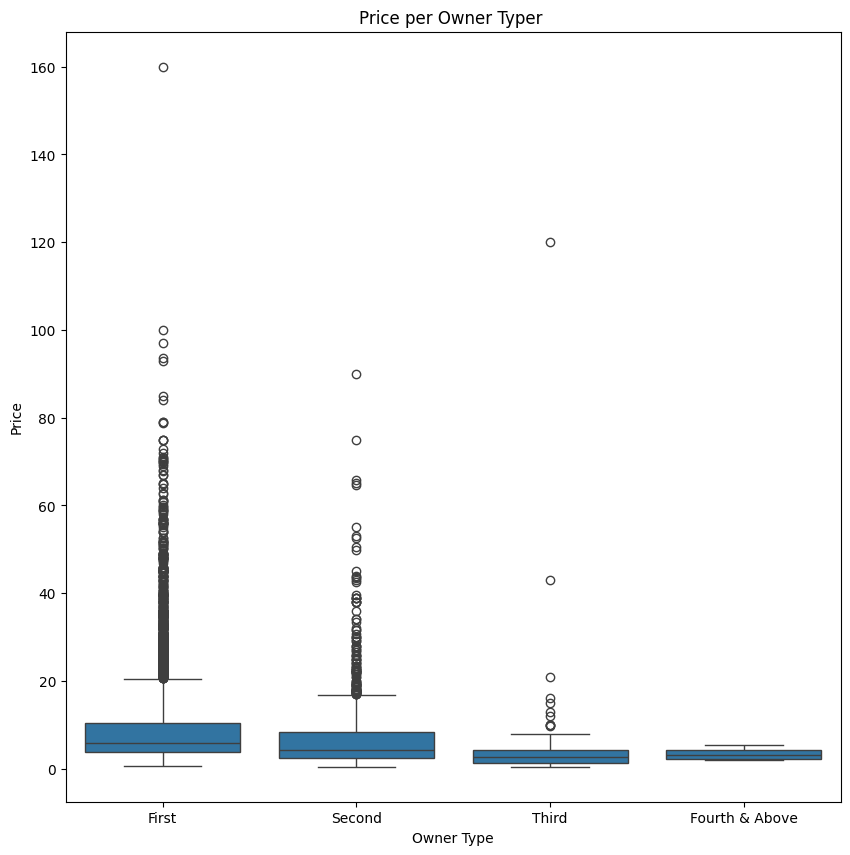

In [23]:
#Price variation  as per owner type
owner_order = ['First', 'Second', 'Third', 'Fourth & Above']
plt.figure(figsize = (10,10))
sns.boxplot(x='Owner_Type' , y = 'Price' , data = df , order = owner_order)
plt.title('Price per Owner Typer ')
plt.xlabel('Owner Type')
plt.ylabel('Price')
plt.show()

**Multiple outiers can be seen --> Which means prices are wide spreaded --> so to make it symmetric we may use log Transformation**

1) Clear trend : It can be as number of owner increases the price ranges drop

2) First and second owner have wide range of car prices  but  for third and fourth owner the prices ranges are tightly clustered around small price range

3) Median for first and second owner are at bottom and outliers are all at high end means overall car prices are lower but few expensive models pulling the average up

In [24]:
#Applying log transformation to Price Column
df['Price_log'] = np.log1p(df['Price'])

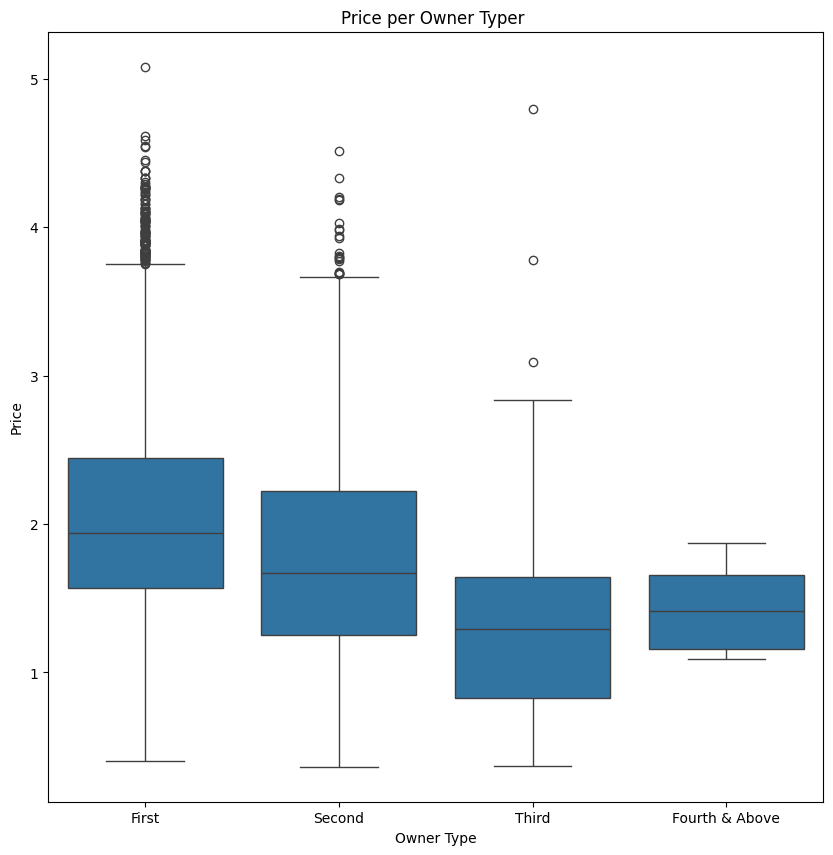

In [33]:
#Price variation  as per owner type
owner_order = ['First', 'Second', 'Third', 'Fourth & Above']
plt.figure(figsize = (10,10))
sns.boxplot(x='Owner_Type' , y = 'Price_log' , data = df , order = owner_order)
plt.title('Price per Owner Typer ')
plt.xlabel('Owner Type')
plt.ylabel('Price')
plt.show()